# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# ensure Matplotlib to include the seaborn graph into the jupyter notebook
%matplotlib inline
#import libraries for warnings
import warnings
#ignore warnings
warnings.filterwarnings("ignore") 

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order details placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Using the shape attribute to determine the number of rows and columns
df.shape

(1898, 9)

#### Observations: 

The dataframe contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
df[df.isnull()].sum()

order_id                 0.0
customer_id              0.0
restaurant_name            0
cuisine_type               0
cost_of_the_order        0.0
day_of_the_week            0
rating                     0
food_preparation_time    0.0
delivery_time            0.0
dtype: object

#### Observations:
The dataframe shows three datatypes:
- Integer (int64)
- Float (float64)
- Object (object) (type string)
The Dataframe does not contain any missing or null values as seen in the result from info(). This is confirmed by the isnull() function.

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# Writing the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data. Passing the list of
# columns to be converted
df[['restaurant_name','cuisine_type', 'day_of_the_week']]= df[['restaurant_name','cuisine_type', 'day_of_the_week']].astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
 We use the builtin function astype() to convert the object type into the category type.This results in a decrease in memory usage that goes from 133.6KB TO 102.7kb or a savings of 30.9 kb. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# The describe() method is used here to generate the statistical summary. Adding the transpose function highlited by T 
# for a better view and rounded the float numbers to 2 decimal points

df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [8]:
# IQR interquartile range for the three variables 

IQR_cost_of_the_order = df['cost_of_the_order'].quantile(0.75)- df['cost_of_the_order'].quantile(0.25)

IQR_food_preparation_time = df['food_preparation_time'].quantile(0.75)- df['food_preparation_time'].quantile(0.25)

IQR_delivery_time = df['delivery_time'].quantile(0.75)- df['delivery_time'].quantile(0.25)

IQR_cost_of_the_order,IQR_food_preparation_time,IQR_delivery_time

(10.2175, 8.0, 8.0)

#### Observations:

- The minimum time to prepare an order points to 20 mn(minutes) while the highest time shows 35 mn.
- An order that costs  (5) five dollars takes a minimum time of 35mn from preparation to delivery while a (35) thirty-five 
  dollars order maximum can take more than an hour.
- The spread of the middle 50% of values for delivery and the food preparation time is the same as they have the same   
  interquartile range (8).


In [9]:

df.describe(exclude='number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
- Shake Shack is the most popular restaurant with 219 frequencies. 
- The American cuisine remains the most sought cuisine, and orders spike on weekends as opposed to weekdays. However, most 
  customers do not rate the rendered services. This finding impedes any opportunity to improve on customer service and 
  satisfaction.


### **Question 5:** How many orders are not rated? [1 mark]

In [10]:
# checking the number of unique values in the column
df['rating'].nunique()

4

In [11]:
# Checking what those unique values are
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [17]:
#This code sums up the number of unrated orders for all restaurants   
not_rated= (df['rating'] == 'Not given').sum()
not_rated

736

#### Observations:
We notice that 736 customers did not provide a rating out of a population of 1898 customers. This is about 39%. That implies that those customers may not understand the ratings's usage; others may not understand the design of the survey or  do not care at all. 

This percentage of non respondants must trigger an investigation as customer feedback is a key management tool for improvement. A bivariate analysis can help dive into the rationale behind the number.
  

### Exploratory Data Analysis (EDA)

### Univariate Analysis: Continous variables

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
# Leveraging the Uber case template
# Create a user defined function to plot the graphs. We choose two graphs histogram and boxplot
def hist_box (df, feature, figsize=(15, 10), kde=True, bins=None):
       
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (20,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
# We use the subplots function that take many arguments but will pick the following: 

    f2, (box1, hist1) = plt.subplots(
        nrows=2,  # Number of rows for the subplots grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        sharey= False,# y-axis will not be shared among all subplots
        gridspec_kw={"height_ratios": (0.40, 0.60)},# constructor used to create the grid the subplots are placed on. This is a dictionary with 
        # a key heigh_ratio and two values 0.40 and 0.60
        figsize=figsize)
    
# creating the 2 subplots

    # adding a boxplot 
    
    sns.boxplot(data=df, x=feature, ax=box1, showmeans=True, color="salmon")  # the mean will be shown as set to True. Shown as a star
    
    # adding a histogram
    
    sns.histplot(data=df, x=feature, kde=kde, ax=hist1, palette="none" )
    
    # Add mean to the histogram with the specified color and line style
    
    hist1.axvline(df[feature].mean(), color="g", linestyle="--"  ) 
    
     # Add median to the histogram with the specified color and line style
        
    hist1.axvline(df[feature].median(), color="r", linestyle="-")


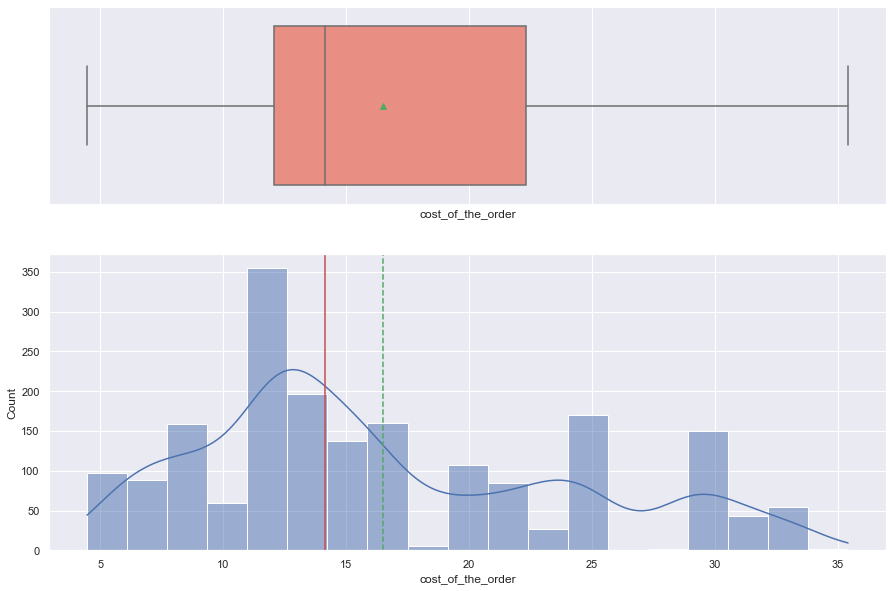

In [14]:
hist_box(df, 'cost_of_the_order')

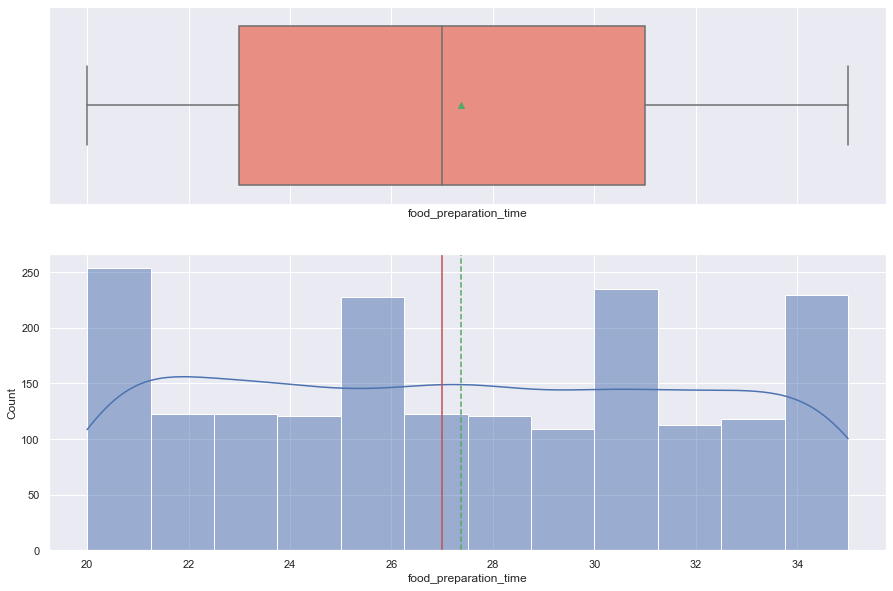

In [15]:
hist_box(df, 'food_preparation_time')

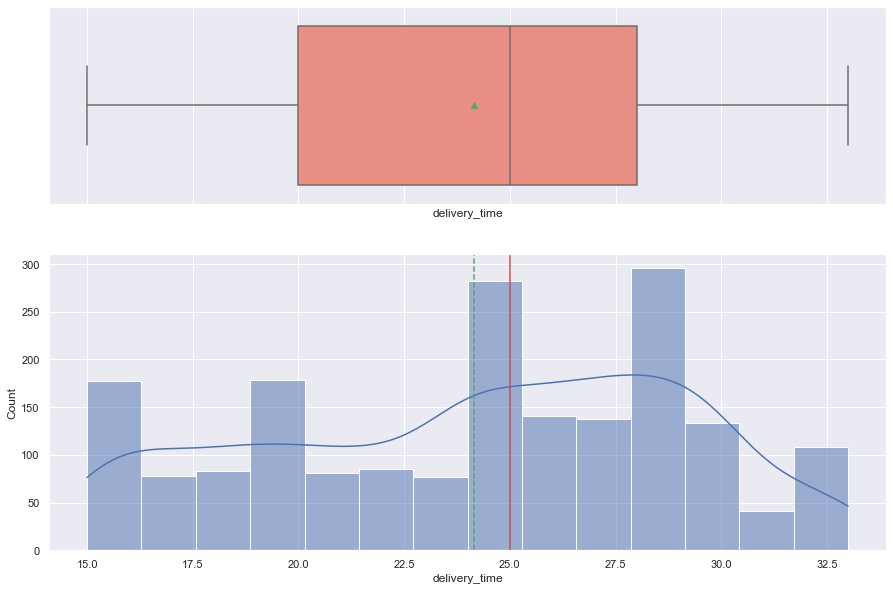

In [16]:
hist_box(df, 'delivery_time')

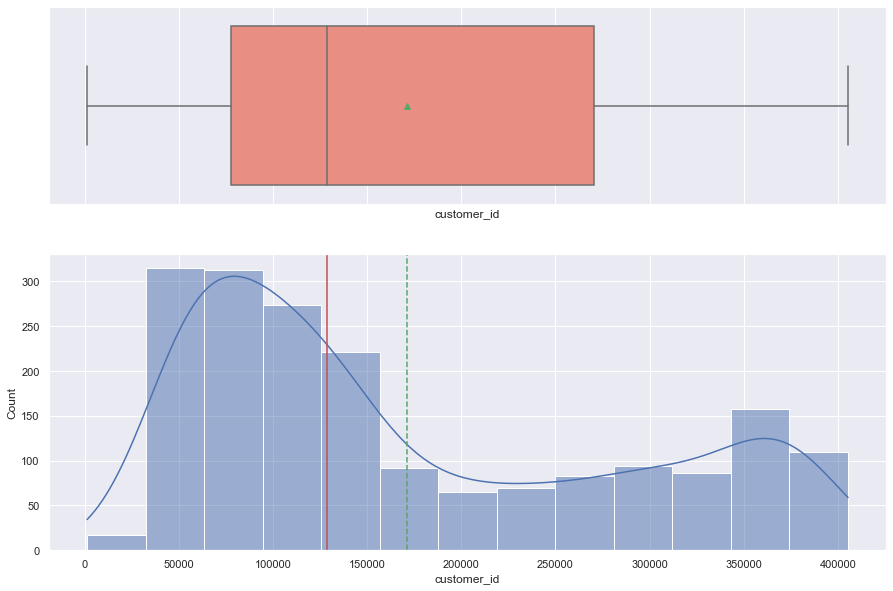

In [17]:
hist_box(df, 'customer_id')

#### Observations:

- The average time for preparing an order stands at 27.37 minutes; for delivery, it is 24.16mn. 
- The cost of order shows a positive skeweness with a distribution towards the right side. Half of the orders (50%) are       above the median price of $14.14 
- The food preparation time is quite a bit well distributed and a skewness leaning to 0. This can be seen troughout the KDE   that is close to a linear line. This implies a good process in the food preparation, and the types of food or/and cost     might be contributing factors as well.
- The average delivery time is at 24.16 min for a minimum time of 15mn and a max of 33 mn.  The median time is 25 mn, which   therefore triggers a left distribution with a negative skewnewss.
- Customer ids provide a right skew distribution. This may suggest that customers whose ids fall  in the range 50000  to 
  275000 (75% of the customer population) belong to particular zip codes, assuming that customers ids's origination follows 
  the zip code segmentation. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# Using the value count function to count the number of times a restaurant is associated with an order. 
tot_order_per_restaurant = df['restaurant_name'].value_counts() 
tot_order_per_restaurant
# Using the nlargest function to show the 5 major ones. Using the reset index function to display a dataframe
tot_order_per_restaurant.nlargest(5).reset_index()

,index,restaurant_name
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations:
Shake Shack restaurant is the most popular restaurant with 219 orders.Meatball shop follows with 132 orders. The restaurants' names seem to suggest that fast food restaurants are the most liked among customers. This may imply that data comes from an urban area with busy professionals.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# First we retrieve the number of Weekend orders. The results of this series are boolean. To get the values, we pass the series
# to the dataframe. Then we assign it to a variable called weekend_order
weekend_order = df[df['day_of_the_week'] == 'Weekend']
# count the number of times a cusine type is associated with a week end order. We choose not to use the reset index function to 
#show the results in a dataframe format
weekend_order['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
Among all the cuisine types, customers prefer the American one on weekends.Closely come, in order, the Japanese, the       Italian, the Chinese and the Mexican. The Vietnamese cuisine comes last. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# In this code, we first calculate the orders greater than 20 
nbr_greater_20 =df [df['cost_of_the_order'] > 20].value_counts().sum()
#Calculating the percentage out of the total of orders
prct_order_greater_20 = ((nbr_greater_20 / df['order_id'].value_counts().sum())* 100).round(2).astype(str) + '%'
prct_order_greater_20


'29.24%'

### **Question 10**: What is the mean order delivery time? [1 mark]

In [9]:
# Finding the average delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- More than two-thirds of all orders do not cost more than 20 dollars. Low budget customers seem to make up the majority 
  of the customer population. 
- The average delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# give vouchers to the top 5 customers
nbr_of_order = df['customer_id'].value_counts().nlargest(5)
nbr_of_order.reset_index() 

,index,customer_id
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


### Univariate Analysis: Categorical Variables 

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=70, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(), )

    for p in ax.patches:
        
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
            

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",)  # annotate the percentage

    plt.show()  # show the plot

<Figure size 576x288 with 0 Axes>

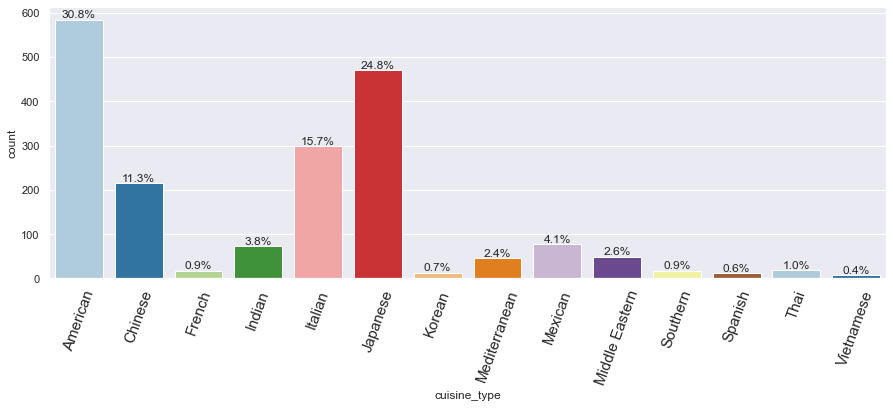

In [16]:
# plotting the cuisine type categorical variable graph to confirm the previous findings
plt.figure(figsize=(8,4))
labeled_barplot(df, 'cuisine_type', perc=True)

<Figure size 576x288 with 0 Axes>

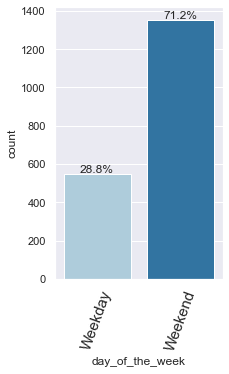

In [14]:
# plotting the day of the week categorical variable graph to confirm the previous findings
plt.figure(figsize=(8,4))
labeled_barplot(df, 'day_of_the_week', perc=True)

<Figure size 576x288 with 0 Axes>

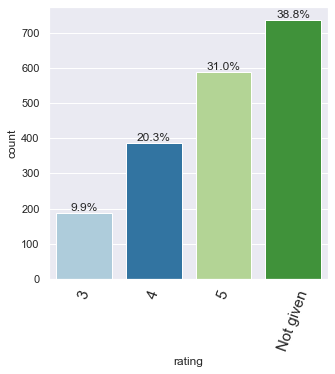

In [26]:
# plotting the rating categorical variable graph
plt.figure(figsize=(8,4))
labeled_barplot(df, 'rating', perc=True)

<Figure size 576x288 with 0 Axes>

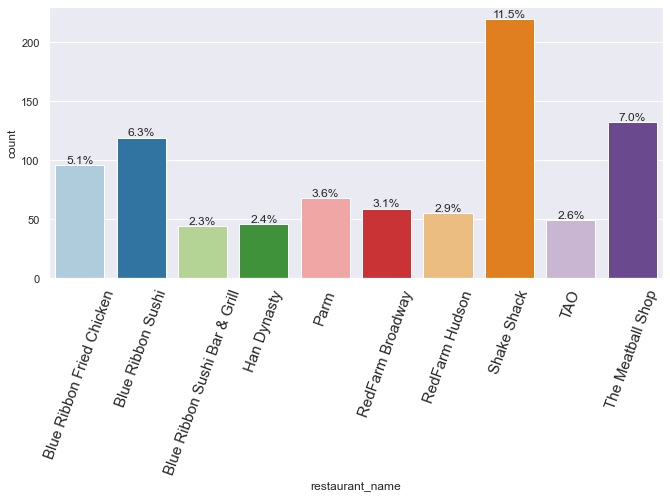

In [17]:
# plotting the restaurant name categorical variable. Setting the number to display to 10
plt.figure(figsize=(8,4))
labeled_barplot(df, 'restaurant_name', perc=True, n=10)

#### Observations:
- The cuisine type data plot confirms the 5 most popoular cuisine types. They are respectively American (30.8%), Japanese   
  (24.8%), Italian(15.7%), Chinese (11.3%) and Mexican (4.1%) cusisine. 
- Week end orders amount to more than twice weekday orders. Week-end orders come to 71.2% while 28.8% for weekday orders.
- A third of the customer population did not provide feedback(38.8%). However, among those who provided one, the highest 
  rating led the list. The 5 star rate was given by 31% of customers. The combined remaining ratings equal to the highest 
  rating number.
- Shake Shake affirms its leardership among the restaurants in the area.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

In [28]:
def hist_box (data, feature, figsize=(15, 10)):
       
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (20,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
# We use the subplots function that take many arguments but will pick the following: 

    f2, (box1, hist1) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        sharey= False,# y-axis will not be shared among all subplots
        gridspec_kw={"height_ratios": (0.40, 0.60)},# constructor used to create the grid the subplots are placed on. This is a dictionary with 
        # a key heigh_ratio and two values 0.40 and 0.60
        figsize=figsize)
    
# creating the 2 subplots

    # adding a boxplot 
    
    sns.boxplot(data=df, x=feature, ax=box1, showmeans=True, color="salmon", hue='rating')  # the mean will be shown as set to True
    
    # adding a histogram
    
    sns.histplot(data=df, x=feature, kde=kde, ax=hist1, palette="none" )
    
    # Add mean to the histogram with the specified color and line style
    
    hist1.axvline(df[feature].mean(), color="g", linestyle="--"  ) 
    
     # Add median to the histogram with the specified color and line style
        
    hist1.axvline(df[feature].median(), color="r", linestyle="-")


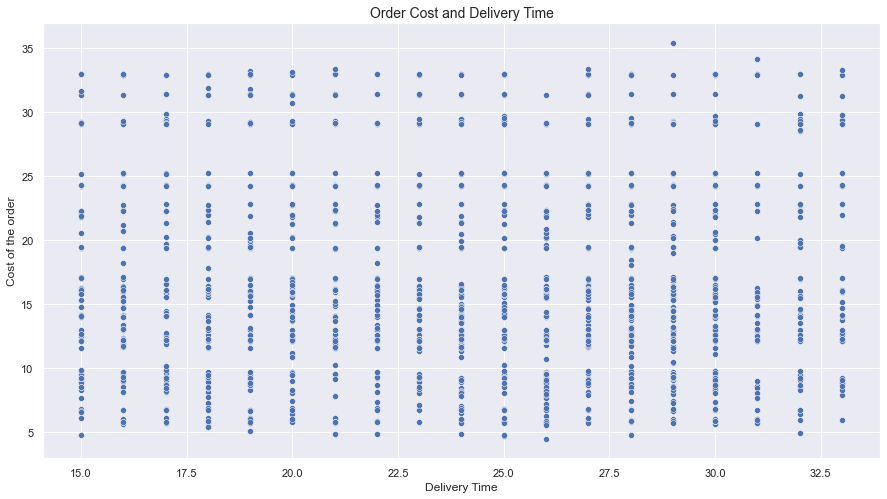

In [29]:
# Plotting a scatterplot for cost of order and delivery time
#figure size
fig = plt.figure(figsize=(15,8))
# figure title
plt.title('Order Cost and Delivery Time',size=14)
# Specifying the plot type, data and axes
ax= sns.scatterplot(data=df,x='delivery_time', y='cost_of_the_order')
# row axis label
plt.xlabel('Delivery Time')
# column axis label
plt.ylabel('Cost of the order')
# show the graph
plt.show()

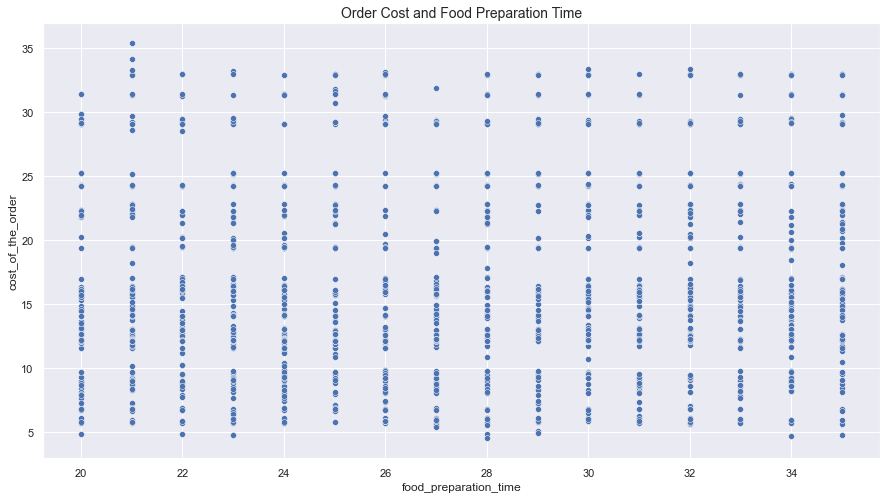

In [30]:
# plotting scatterplot for order cost and food preparation time
fig = plt.figure(figsize=(15,8))
plt.title('Order Cost and Food Preparation Time', size=14)
ax= sns.scatterplot(data=df,x='food_preparation_time', y='cost_of_the_order')
plt.xlabel('food_preparation_time')
plt.ylabel('cost_of_the_order')
plt.show()

#### Observations:
- The order cost does not seem to be impacted by the delivery or the food preparation time.
- The cost remains the same for min or max time for food preparation or delivery

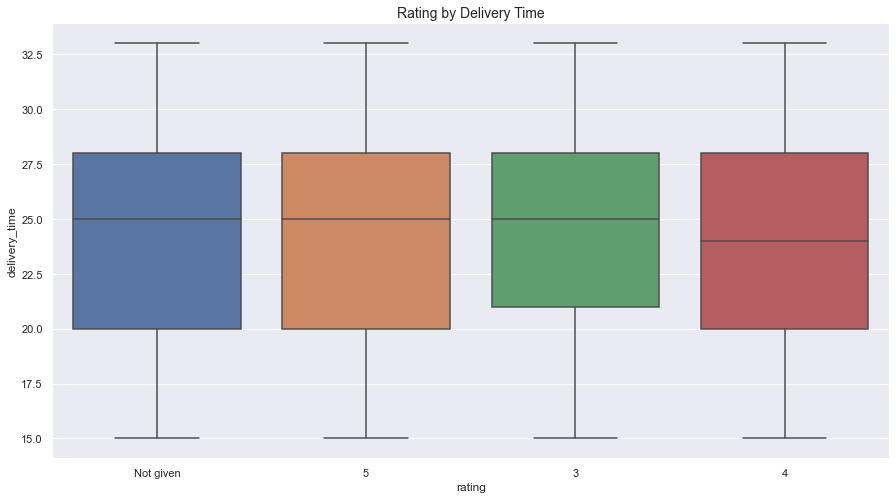

In [31]:
# plotting a boxplot for rating and delivery time
fig = plt.figure(figsize=(15,8))
plt.title('Rating by Delivery Time', size=14)
ax= sns.boxplot(data=df,x='rating', y='delivery_time')
plt.xlabel('rating')
plt.ylabel('delivery_time')
plt.show()

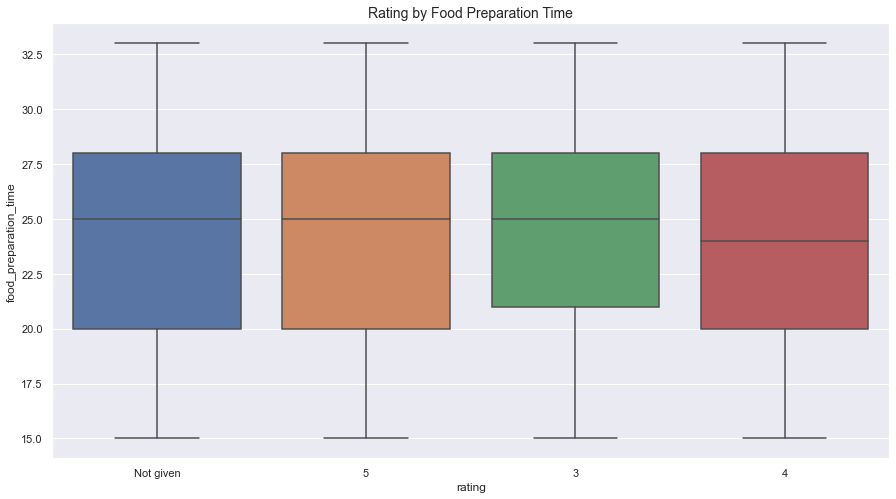

In [32]:
# plotting a boxplot for rating and food preparation time
fig = plt.figure(figsize=(15,8))
plt.title('Rating by Food Preparation Time', size=14)
ax= sns.boxplot(data=df,x='rating', y='delivery_time')
plt.xlabel('rating')
plt.ylabel('food_preparation_time')
plt.show()

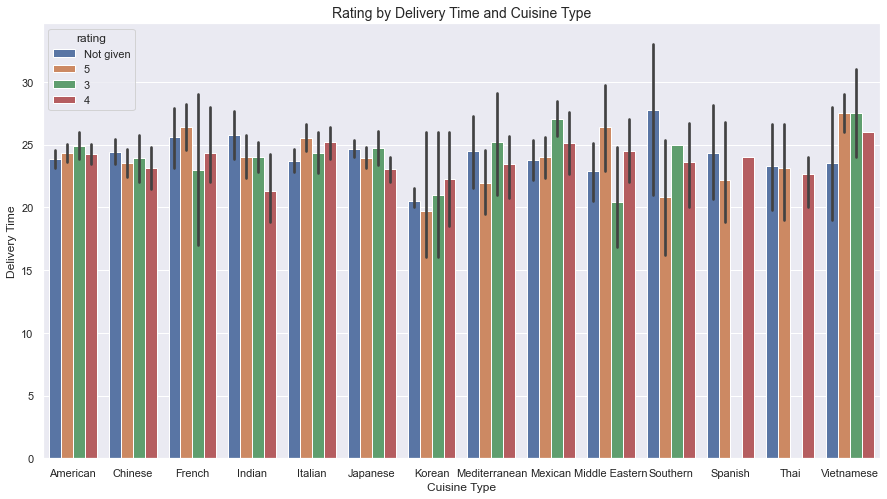

In [33]:
# plotting a barplot for cuisine type, delivery time with a hue on rating
fig = plt.figure(figsize=(15,8))
plt.title('Rating by Delivery Time and Cuisine Type', size=14)
ax= sns.barplot(data=df,x='cuisine_type', y='delivery_time', hue='rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.show()

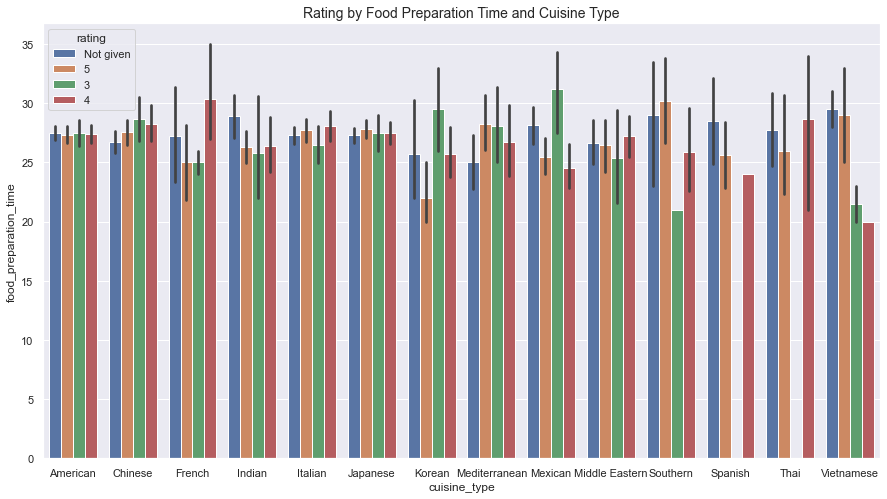

In [34]:
# plotting a barplot for cuisine type, food prepartion time with a hue on rating
fig = plt.figure(figsize=(15,8))
plt.title('Rating by Food Preparation Time and Cuisine Type', size=14)
ax= sns.barplot(data=df,x='cuisine_type', y='food_preparation_time', hue='rating')
plt.xlabel('cuisine_type')
plt.ylabel('food_preparation_time')
plt.show()

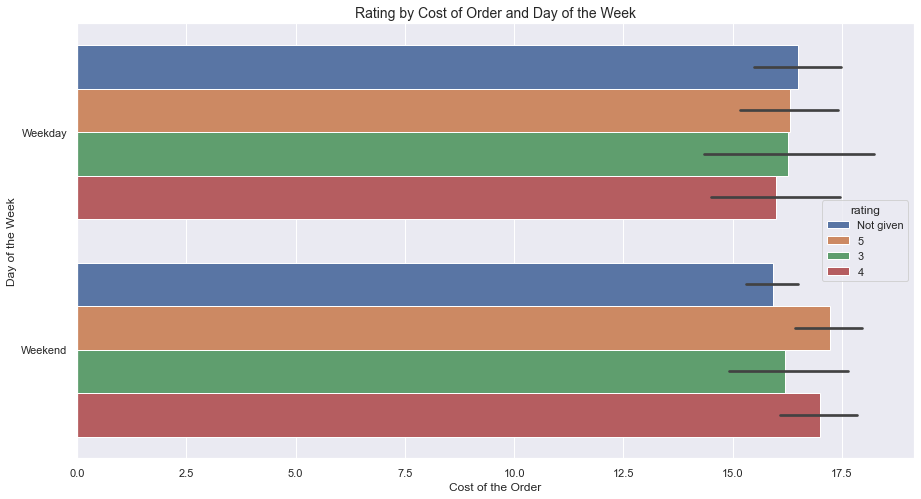

In [35]:
# plotting a barplot for cost of the order  and day of the week with a hue on rating
fig = plt.figure(figsize=(15,8))
plt.title('Rating by Cost of Order and Day of the Week', size=14)
ax= sns.barplot(data=df,x='cost_of_the_order', y='day_of_the_week', hue='rating')
plt.xlabel('Cost of the Order')
plt.ylabel('Day of the Week')
plt.show()

#### Observations:
- The delivery time, the food preparation time and the cuisine types do not seeem to be key factors in the rating process. 
  For instance, for the minimum delivery time (15mn), rating was provided in some cases and not in other cases. The food 
  preparation time  remains within acceptable margins accross all cuisine types. Variations that can spark concerns are not   noted in the different graphs. 
- Order cost is independant of ratings.
- Spanish and Thai cuisines did not have the lowest rate(3). Their ratings stand between 4 and 5.
- The Mexican cuisine earns the lowest rating spot for food preparation and the second lowest rating for delivery.
- The Vietnamese cuisine presents the highest rating (5) for delivery and the second highest for food preparation despite  
  being the least popular cuisine in terms of orders. 


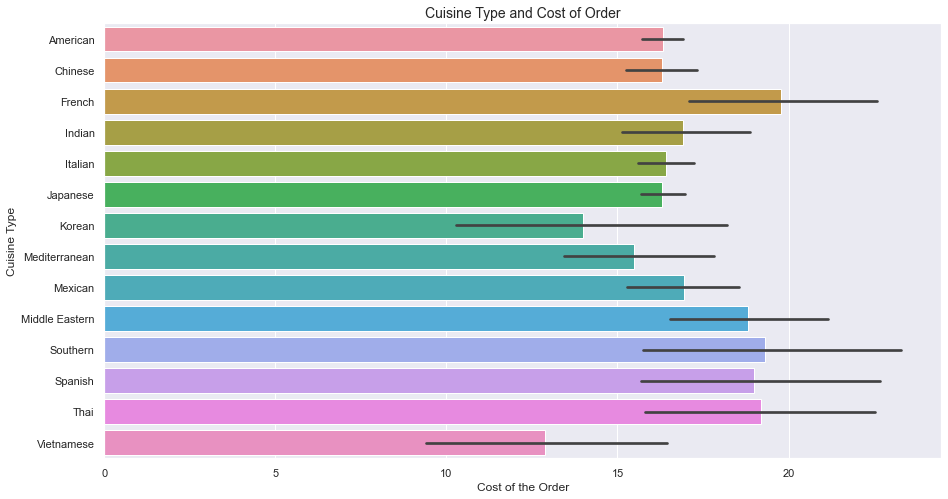

In [36]:
# # plotting a barplot on the y axis  for cuisine type and cost of order
fig = plt.figure(figsize=(15,8))
plt.title('Cuisine Type and Cost of Order', size=14)
ax= sns.barplot(data=df,x='cost_of_the_order', y='cuisine_type')
plt.xlabel('Cost of the Order')
plt.ylabel('Cuisine Type')
plt.show()

#### Observations:
- Order costs vary with the cuisine types but remain in acceptable margins. Vietnamese and Korean cuisines are the   
  cheapest among all types of cuisine. French is the most expensive. 
- Thai, Southern, Spanish and Middle Eastern are also expensive. American and Chinese cuisine cost the same. Most orders  
  lie within the 20 dollars range.  

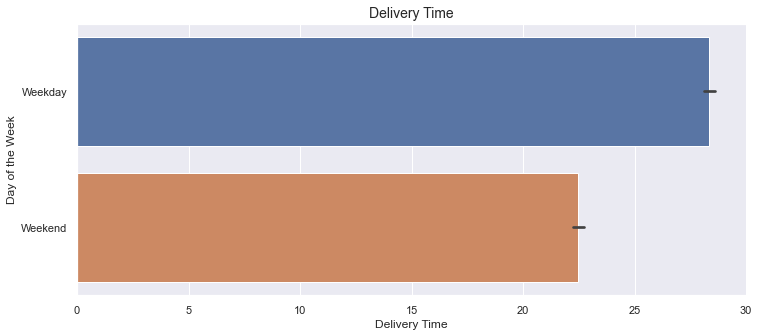

In [37]:
# plotting a barplot for delivery time and day of the week
fig = plt.figure(figsize=(12,5))
plt.title('Delivery Time', size=14)
ax= sns.barplot(data=df,x='delivery_time', y='day_of_the_week')
plt.xlabel('Delivery Time')
plt.ylabel('Day of the Week')
plt.show()

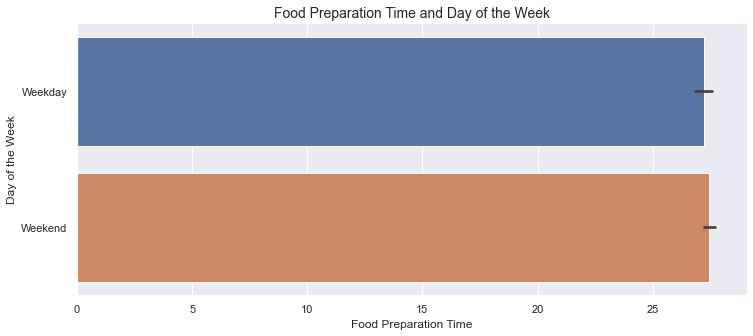

In [38]:
# plotting a barplot for preparation time and day of the week
fig = plt.figure(figsize=(12,5))
plt.title('Food Preparation Time and Day of the Week', size=14)
ax= sns.barplot(data=df,x='food_preparation_time', y='day_of_the_week')
plt.xlabel('Food Preparation Time')
plt.ylabel('Day of the Week')
plt.show()

#### Observations:
- Delivery time is shorter on weekends than in weekdays.
- Food preparation time is independent of weekdays or weekends. It remains the same accross all days.
- The day of the week does not seem to impact the cost of orders nor the ratings.

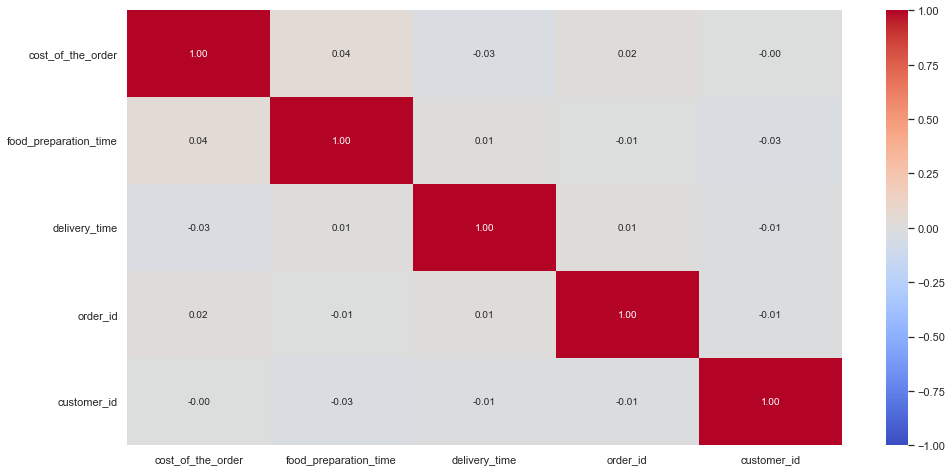

In [18]:
#Checking for correlation among numerical variables
# Determining the list of numerical variables
fh_num_var = ['cost_of_the_order','food_preparation_time','delivery_time','order_id', 'customer_id']
# Passing the list to the dataframe and applying the correlation function. Then assign the result to a variable cor
cor = df[fh_num_var].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(cor, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm", xticklabels=cor.columns, yticklabels=cor.columns)
plt.show()

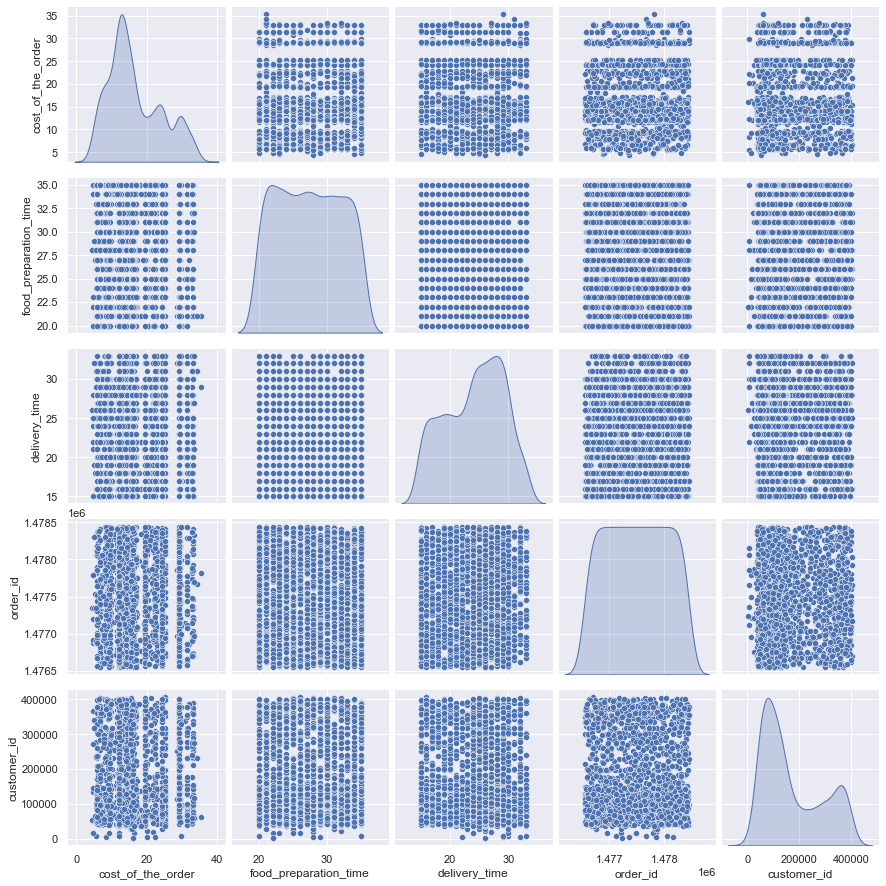

In [40]:
# Plotting the numerical variables to see their relationships with pairplot
sns.pairplot(data=df[fh_num_var], diag_kind="kde")
plt.show()

#### Observations:
- Correlation between the numeric variables remains weak, if not inexistent or negative. A very slight correlation is noted 
  between food preparation time and cost of the order. It is the highest in the analysis.
- The pairplot confirms these findings as no strong negative or positive correlation is noted.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [31]:
# Filtering the dataframe to analyze only data with given ratings. Working on a copy of a dataframe and asssigning to 
# a new dataframe rating_list
rating_list= df[df['rating'] != 'Not given'].copy()
#converting the rating column object to an integer column to perform operations
rating_list['rating'] =rating_list['rating'].astype('int')
# Pulling the list of restaurants with their ratings count
rating_list_count = rating_list.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
# Extracting the list of restaurants whose ratings count is greater than 50
ratingc_greater_50= rating_list_count[rating_list_count['rating' ] >50]
#Displaying the list
ratingc_greater_50



,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [58]:
# Calculating the average rating by restaurant
rating_mean_byrestaurant= rating_list.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
rating_mean_greater4= rating_mean_byrestaurant[rating_mean_byrestaurant['rating'] > 4]
rating_mean_greater4.head(5)

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [43]:
# defining the function to apply fees
def apply_fees(price):
    
     if price > 20:
        return price * 0.25
  
     elif price > 5:
        return price * 0.15
  
     else:
        return price * 0
    
    

In [44]:
# define a new dataframe column to store the results
df['revenue'] = df['cost_of_the_order'].apply(apply_fees)
df['revenue']
# check the results with the 10 first rows
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.3050
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.4660
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.0770


In [45]:
# Calculating the total revenue for the company
Total_Revenue= df['revenue'].sum()
Total_Revenue

6166.303

#### Observations:
- The company generates $6.166.303 in revenue. One question arises.In which timeframe these data were collected?  
  Is this revenue weekly, monthly or bi-monthly? This is a critical question to answer to assess one parameter of business   profitability.  


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [46]:
# Finding the total delivery time greater than 60
Total_food_delivery_time=  df[df['food_preparation_time'] + df['delivery_time'] > 60]
# Calculate the percentage of orders greater than 60 minutes. Using the len function to return the number of orders and then
# dividing it by the total number of orders using as well the same len function. Finally multiplying by 100 to get the percent.
Percent_food_delvry_over60= ((len(Total_food_delivery_time)/ len(df)) * 100)
Percent_food_delvry_over60

10.537407797681771

#### Observations:
- The percentage of food preparation and delivery time that takes more than 60 minutes points to 10.53% This is a fair 
  percentage that can be lowered by finding ways to speed up delivery. 


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [47]:
#  filtering the weekday data. Returning boolean values
delivery_weekday= df['day_of_the_week'] == 'Weekday'
# Passing it to the dataframe to get values to calculate the mean value of the delivery time column
wkday_deltime = df[delivery_weekday]['delivery_time'].mean()
wkday_deltime 

28.340036563071298

In [48]:
#  filtering the weekday data. Returning boolean values
delivery_weekend= df['day_of_the_week'] == 'Weekend'
# Passing it to the dataframe to get values to calculate the mean value of the delivery time column
wkend_deltime = df[delivery_weekend]['delivery_time'].mean()
wkend_deltime 

22.4700222057735

#### Observations:
- The average delivery time on weekdays (28mn) is greater than in weekends (22 mn). This can be seen on the univariate analysis

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion and Recommendations

- The Foodhub's data analysis reveals an absence of strong correlation between the data. Foodhub's key 
  performance indicator (KPI), which is rating, does not seem to be impacted by food preparation time nor delivery time or 
  cost. One question arises. Is the survey well understood by customers? Are they rating the restaurant or the food  
  aggregator? 
- The Customer's rating process seems to obey parameters outside of the business goal's understanding.
- Order costs are within a reasonable limit of affordability for a very urban area as we do not see outliers. Most orders  
  cost between 5 to 25 dollars.
- Orders with customer ids between 50000 and 150000 are important. 

  With these findings, the food aggregator can sort out this question with a well designed survey that can reduce  
  the sizable part of 'Not  given' ratings.
- The food aggregator can also tailor their communications to pinpoint the survey's goal: improve customer satisfaction.  -- Customer satisfaction entails minimizing the delivery time on weekends when the bulk of orders occurs. 
- Fasten deliveries on weekdays can be an area to improve on as well.
- Understand the rationale behind the strong customer base with id related to certain numbers that can be associated with 
  geographical areas.
- Focus on popular cuisines to build a niche and boost revenue and drop those that are not significant in terms orders'  
  volume.

 